In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [21]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [22]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
engine.execute('SELECT *FROM measurement LIMIT 20').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [24]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [25]:
engine.execute('SELECT *FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 2 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()
Measurement = Base.classes.measurement
precipitation_12monthsago = session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date > '2016-10-01').all()
print(precipitation_12monthsago)

[(0.0, '2016-10-02'), (0.0, '2016-10-03'), (0.0, '2016-10-04'), (0.0, '2016-10-05'), (0.0, '2016-10-06'), (0.0, '2016-10-07'), (0.0, '2016-10-08'), (0.0, '2016-10-09'), (0.0, '2016-10-10'), (0.0, '2016-10-11'), (0.0, '2016-10-12'), (0.0, '2016-10-13'), (0.0, '2016-10-14'), (0.0, '2016-10-15'), (0.0, '2016-10-16'), (0.01, '2016-10-17'), (0.0, '2016-10-18'), (0.0, '2016-10-19'), (0.0, '2016-10-20'), (0.05, '2016-10-21'), (0.15, '2016-10-22'), (0.01, '2016-10-23'), (0.0, '2016-10-24'), (0.03, '2016-10-25'), (0.0, '2016-10-26'), (0.0, '2016-10-27'), (0.0, '2016-10-28'), (0.0, '2016-10-29'), (0.24, '2016-10-30'), (0.03, '2016-10-31'), (0.0, '2016-11-01'), (0.0, '2016-11-02'), (0.0, '2016-11-03'), (0.0, '2016-11-04'), (0.0, '2016-11-05'), (0.0, '2016-11-06'), (0.0, '2016-11-07'), (0.07, '2016-11-08'), (0.0, '2016-11-09'), (0.0, '2016-11-10'), (0.0, '2016-11-11'), (0.0, '2016-11-12'), (0.0, '2016-11-13'), (0.0, '2016-11-14'), (0.0, '2016-11-15'), (0.0, '2016-11-16'), (0.0, '2016-11-17'), (0.0

In [37]:
# Calculate the date 2 year ago from today
query_date_2yearsago = dt.date.today() - dt.timedelta(days = 730)
print(query_date_2yearsago)

2016-10-04


In [41]:
# Perform a query to retrieve the data and precipitation scores
precipitation_2yearsago = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > query_date_2yearsago).order_by(Measurement.date.desc()).all()
print(precipitation_2yearsago)

[(0.0, '2017-08-23'), (0.0, '2017-08-23'), (0.08, '2017-08-23'), (0.45, '2017-08-23'), (0.0, '2017-08-22'), (0.0, '2017-08-22'), (0.5, '2017-08-22'), (0.0, '2017-08-21'), (0.02, '2017-08-21'), (None, '2017-08-21'), (0.56, '2017-08-21'), (0.0, '2017-08-20'), (0.01, '2017-08-20'), (None, '2017-08-20'), (0.0, '2017-08-19'), (0.0, '2017-08-19'), (None, '2017-08-19'), (0.09, '2017-08-19'), (0.0, '2017-08-18'), (0.0, '2017-08-18'), (0.06, '2017-08-18'), (None, '2017-08-18'), (0.0, '2017-08-17'), (0.05, '2017-08-17'), (0.01, '2017-08-17'), (0.13, '2017-08-17'), (0.0, '2017-08-16'), (0.07, '2017-08-16'), (0.12, '2017-08-16'), (0.42, '2017-08-16'), (0.02, '2017-08-15'), (0.0, '2017-08-15'), (0.06, '2017-08-15'), (0.32, '2017-08-15'), (0.42, '2017-08-15'), (0.0, '2017-08-14'), (0.01, '2017-08-14'), (0.08, '2017-08-14'), (0.0, '2017-08-14'), (0.22, '2017-08-14'), (0.0, '2017-08-13'), (None, '2017-08-13'), (0.0, '2017-08-13'), (0.0, '2017-08-13'), (None, '2017-08-13'), (0.0, '2017-08-12'), (0.0, '

In [43]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_2yearsago, columns = ["prcp","date"])
df = df.set_index("date")
print(df)

            prcp
date            
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45
2017-08-22  0.00
2017-08-22  0.00
2017-08-22  0.50
2017-08-21  0.00
2017-08-21  0.02
2017-08-21   NaN
2017-08-21  0.56
2017-08-20  0.00
2017-08-20  0.01
2017-08-20   NaN
2017-08-19  0.00
2017-08-19  0.00
2017-08-19   NaN
2017-08-19  0.09
2017-08-18  0.00
2017-08-18  0.00
2017-08-18  0.06
2017-08-18   NaN
2017-08-17  0.00
2017-08-17  0.05
2017-08-17  0.01
2017-08-17  0.13
2017-08-16  0.00
2017-08-16  0.07
2017-08-16  0.12
2017-08-16  0.42
...          ...
2016-10-09  0.00
2016-10-09  0.00
2016-10-09  0.00
2016-10-09  0.00
2016-10-08  0.00
2016-10-08  0.00
2016-10-08  0.00
2016-10-08  0.00
2016-10-08  0.04
2016-10-07  0.00
2016-10-07  0.00
2016-10-07  0.00
2016-10-07   NaN
2016-10-07  0.00
2016-10-07  0.00
2016-10-07  0.01
2016-10-06  0.00
2016-10-06  0.05
2016-10-06  0.00
2016-10-06  0.07
2016-10-06  0.00
2016-10-06  0.00
2016-10-06  0.04
2016-10-05  0.00
2016-10-05  0.00
2016-10-05  0.

In [57]:
#Sort the dataframe by date
data_df = df.sort_values(by = "date", ascending=True)
data_df.fillna(0)
data_df.head()

,prcp
date,
2016-10-05,0.82
2016-10-06,0.16
2016-10-07,0.01
2016-10-08,0.04
2016-10-09,0.00


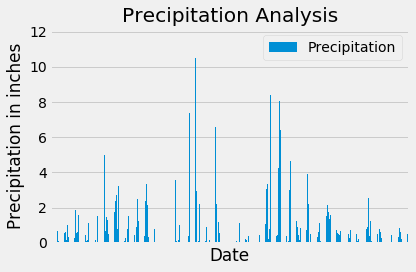

In [64]:
#Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(kind = "bar")
plt.xlabel("Date")
plt.ylabel("Precipitation in inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
# Rotate the xticks for the dates
plt.xticks([], [])

plt.tight_layout()
plt.show()

In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,prcp
count,323.000000
mean,0.872198
std,1.623763
min,0.000000
25%,0.040000
50%,0.350000
75%,0.910000
max,11.620000


In [68]:
# How many stations are available in this dataset?
Station = Base.classes.station
stations = session.query(Station).count()
print(f'There are {stations} stations in the database')

There are 9 stations in the database


In [70]:
session.query(Station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [72]:
# What are the most active stations?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = stations[0][0]
record = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*record).filter(Measurement.station == most_active).first()

(54.0, 85.0, 71.66378066378067)

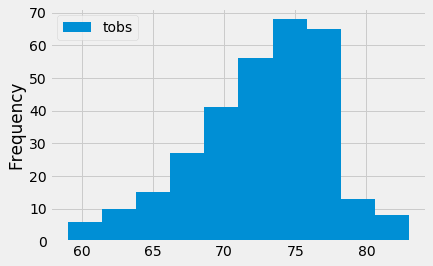

In [80]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_tobs = session.query(Measurement.tobs).filter(Measurement.date > query_date_2yearsago).filter(Measurement.station == most_active).all()

df_highest_tobs = pd.DataFrame(highest_tobs, columns = ["tobs"])
df_highest_tobs
df_highest_tobs.plot(kind="hist")

In [81]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [98]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
new_start_date = dt.date(2017, 8, 2) 
new_end_date = dt.date(2017, 8, 9)
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= new_start_date).filter(Measurement.date <= new_end_date).all()
    
print(calc_temps ('2017-08-02', '2017-08-09'))

[(71.0, 79.58064516129032, 83.0)]


In [99]:
temp_df = pd.DataFrame(calc_temps ('2017-08-02', '2017-08-09'), columns=['min', 'avg', 'max'])
temp_df

,min,avg,max
0,71.0,79.580645,83.0


([], <a list of 0 Text xticklabel objects>)

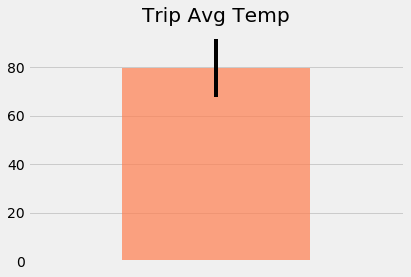

In [103]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temp_df['avg'].plot(kind='bar', color='coral', alpha=0.7, yerr=temp_df['max'] - temp_df['min'])
plt.title("Trip Avg Temp")
plt.savefig("Resources/trip_avg_temp.png")
plt.xticks([])

In [102]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
data = [Measurement.prcp, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
prcp_data = session.query(*data).filter(Measurement.station==Station.station).\
    filter(Measurement.date >= new_start_date).\
    filter(Measurement.date <= new_end_date).\
    group_by(Station.station).\
    order_by(Measurement.prcp).all()
print(prcp_data)


[(0.0, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (0.0, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (0.0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (0.0, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (0.15, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


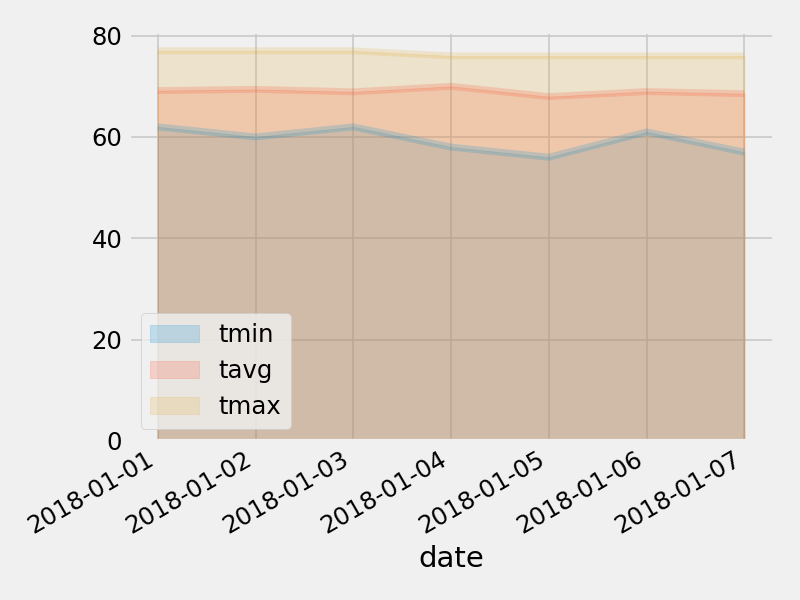

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
